In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)



merged_mouse_ct = pd.merge(mouse_df,clinical_trial_df,how = 'outer',on = 'Mouse ID')
merged_mouse_ct = merged_mouse_ct.loc[merged_mouse_ct['Mouse ID'] != 'g989']
# Combine the data into a single dataset


# Display the data table for preview



In [2]:
merged_mouse_ct.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
tumor_df = merged_mouse_ct[['Drug','Timepoint','Tumor Volume (mm3)']]

#this is a way of doing the mean
#.unstack will change the format of the data
tumor_group = tumor_df.groupby(['Drug','Timepoint'])
#storing the mean
tumor_mean = tumor_group.mean().unstack(level=0)

#this is a different way of doing the mean*******this may be the correct method
tumor_group_mean1 = tumor_df.groupby(['Drug','Timepoint'],as_index=False)['Tumor Volume (mm3)'].mean().unstack(level=0)


#storing the standard error
tumor_std_error = tumor_group.sem().unstack(level=0)

tumor_std_error.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.241842  0.482955  0.254830  0.188950  
10         0.402064  0.388701  0.720225  0.461474  0.263949  
15         0.614461  0.502024  0.770432  0.532904  0.370544  
20         0.839609  0.607412  0.786199  0.684670  0.533182

In [4]:
#creating upper and lower limits for errorbar
tumor_upperlim = tumor_mean +tumor_std_error
tumor_lowerlim = tumor_mean -tumor_std_error
#creating line plot
x_axis = [x for x in tumor_df['Timepoint'].drop_duplicates()]

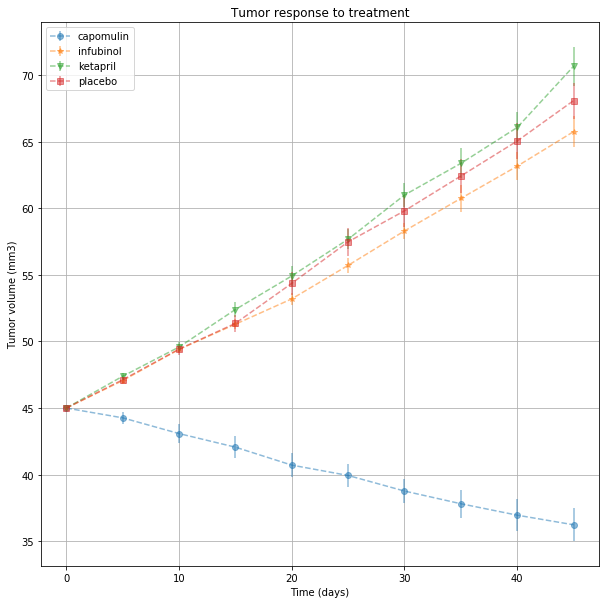

In [95]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,10))
plt.grid()
capomulin_mean = tumor_mean.iloc[:,0]
ceftamin_mean= tumor_mean.iloc[:,1]
infubinol_mean= tumor_mean.iloc[:,2]
ketapril_mean= tumor_mean.iloc[:,3]
naftisol_mean= tumor_mean.iloc[:,4]
placebo_mean= tumor_mean.iloc[:,5]
propriva_mean= tumor_mean.iloc[:,6]
ramicane_mean= tumor_mean.iloc[:,7]
stelasyn_mean= tumor_mean.iloc[:,8]
zoniferol_mean = tumor_mean.iloc[:,9]

capomulin_sem = tumor_std_error.iloc[:,0]
ceftamin_sem= tumor_std_error.iloc[:,1]
infubinol_sem= tumor_std_error.iloc[:,2]
ketapril_sem= tumor_std_error.iloc[:,3]
naftisol_sem= tumor_std_error.iloc[:,4]
placebo_sem= tumor_std_error.iloc[:,5]
propriva_sem= tumor_std_error.iloc[:,6]
ramicane_sem= tumor_std_error.iloc[:,7]
stelasyn_sem= tumor_std_error.iloc[:,8]
zoniferol_sem = tumor_std_error.iloc[:,9]

plt.errorbar(x_axis,capomulin_mean,yerr=capomulin_sem,label= "capomulin",marker = 'o',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,ceftamin_mean,yerr=ceftamin_sem,label= "ceftamin",marker = 'x',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,infubinol_mean,yerr=infubinol_sem,label= "infubinol",marker = '*',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,ketapril_mean,yerr=ketapril_sem,label= "ketapril",marker = 'v',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,naftisol_mean,yerr=naftisol_sem,label= "naftisol",marker = '^',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,placebo_mean,yerr=placebo_sem,label= "placebo",marker = 's',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,propriva_mean,yerr=propriva_sem,label= "propriva",marker = '+',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,ramicane_mean,yerr=ramicane_sem,label= "ramicane",marker = 'D',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,stelasyn_mean,yerr=stelasyn_sem,label= "stelasyn",marker = 'p',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,zoniferol_mean,yerr=zoniferol_sem,label= "zoniferol",alpha = 0.5,ls ='dashed')
plt.legend(loc="upper left")
plt.xlabel('Time (days)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor response to treatment')
# Save the Figure
# Preview that Reformatting worked
plt.savefig('avg_tumor_volume.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = merged_mouse_ct[['Drug', 'Timepoint', 'Metastatic Sites']]
met_group = met_df.groupby(['Drug','Timepoint'])
mean_met = met_group.mean().unstack(level = 0)



#store the standard error
stderr_met = met_group.sem().unstack(level=0)

# Convert to DataFrame

# Preview DataFrame

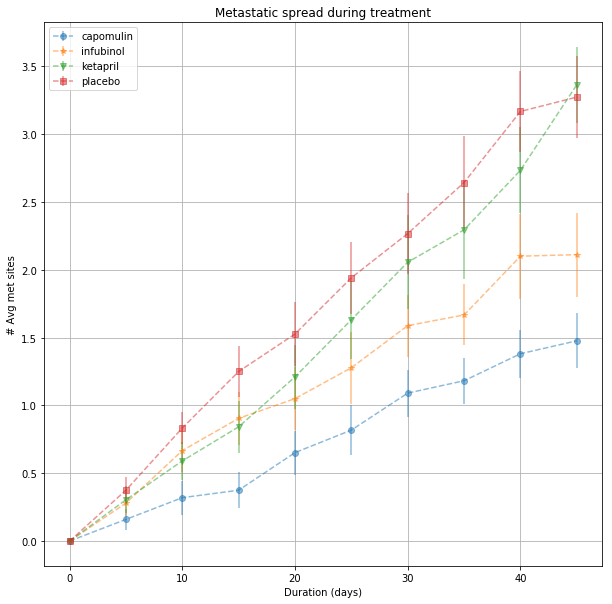

In [94]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,10))
plt.grid()
capomulin_met = mean_met.iloc[:,0]
ceftamin_met= mean_met.iloc[:,1]
infubinol_met= mean_met.iloc[:,2]
ketapril_met= mean_met.iloc[:,3]
naftisol_met= mean_met.iloc[:,4]
placebo_met= mean_met.iloc[:,5]
propriva_met= mean_met.iloc[:,6]
ramicane_met= mean_met.iloc[:,7]
stelasyn_met= mean_met.iloc[:,8]
zoniferol_met = mean_met.iloc[:,9]

capomulin_sem_met = stderr_met.iloc[:,0]
ceftamin_sem_met= stderr_met.iloc[:,1]
infubinol_sem_met= stderr_met.iloc[:,2]
ketapril_sem_met= stderr_met.iloc[:,3]
naftisol_sem_met= stderr_met.iloc[:,4]
placebo_sem_met= stderr_met.iloc[:,5]
propriva_sem_met= stderr_met.iloc[:,6]
ramicane_sem_met= stderr_met.iloc[:,7]
stelasyn_sem_met= stderr_met.iloc[:,8]
zoniferol_sem_met = stderr_met.iloc[:,9]

plt.errorbar(x_axis,capomulin_met,yerr=capomulin_sem_met,label= "capomulin",marker = 'o',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,ceftamin_met,yerr=ceftamin_sem_met,label= "ceftamin",marker = 'x',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,infubinol_met,yerr=infubinol_sem_met,label= "infubinol",marker = '*',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,ketapril_met,yerr=ketapril_sem_met,label= "ketapril",marker = 'v',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,naftisol_met,yerr=naftisol_sem_met,label= "naftisol",marker = '^',alpha = 0.5,ls ='dashed')
plt.errorbar(x_axis,placebo_met,yerr=placebo_sem_met,label= "placebo",marker = 's',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,propriva_met,yerr=propriva_sem_met,label= "propriva",marker = '+',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,ramicane_met,yerr=ramicane_sem_met,label= "ramicane",marker = 'D',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,stelasyn_met,yerr=stelasyn_sem_met,label= "stelasyn",marker = 'p',alpha = 0.5,ls ='dashed')
#plt.errorbar(x_axis,zoniferol_sem,yerr=zoniferol_sem_met,label= "zoniferol",alpha = 0.5,ls ='dashed')
plt.legend(loc="upper left")
plt.xlabel('Duration (days)')
plt.ylabel('# Avg met sites')
plt.title('Metastatic spread during treatment')
# Save the Figure
# Preview that Reformatting worked
plt.savefig('avg_mets.png')
# Show the Figure
plt.show()

## Survival Rates

In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_df = merged_mouse_ct[['Mouse ID','Drug','Timepoint']]
alive_count = survival_df.groupby('Drug').count()['Mouse ID']
#countsx = [x for x in alive_count if x>=10]
countsx = [x for x in alive_count >=10]
countsx = alive_count.sort_values(ascending = False)

survival_df = merged_mouse_ct[['Mouse ID','Drug','Timepoint']]

survive_count = survival_df.groupby(['Drug','Timepoint']).count().unstack(level=0)
survive_count
totals = survive_count.iloc[0,:]
survive_percent = (survive_count / totals)*100
# Convert to DataFrame

# Preview DataFrame

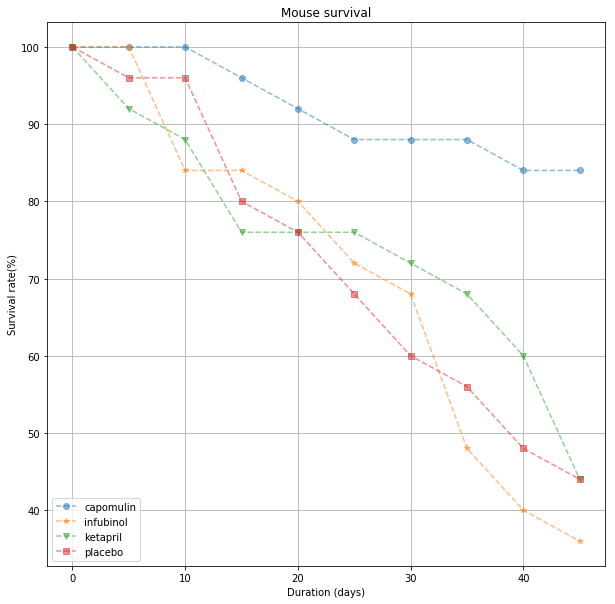

In [93]:
plt.figure(figsize=(10,10))
plt.grid()
capomulin_survive_perc = survive_percent.iloc[:,0]
ceftamin_survive_perc= survive_percent.iloc[:,1]
infubinol_survive_perc= survive_percent.iloc[:,2]
ketapril_survive_perc= survive_percent.iloc[:,3]
naftisol_survive_perc= survive_percent.iloc[:,4]
placebo_survive_perc= survive_percent.iloc[:,5]
propriva_survive_perc= survive_percent.iloc[:,6]
ramicane_survive_perc= survive_percent.iloc[:,7]
stelasyn_survive_perc= survive_percent.iloc[:,8]
zoniferol_survive_perc = survive_percent.iloc[:,9]

plt.plot(x_axis,capomulin_survive_perc,label= "capomulin",marker = 'o',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,ceftamin_survive_perc,label= "ceftamin",marker = 'x',alpha = 0.5,ls ='dashed')
plt.plot(x_axis,infubinol_survive_perc,label= "infubinol",marker = '*',alpha = 0.5,ls ='dashed')
plt.plot(x_axis,ketapril_survive_perc,label= "ketapril",marker = 'v',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,naftisol_survive_perc,label= "naftisol",marker = '^',alpha = 0.5,ls ='dashed')
plt.plot(x_axis,placebo_survive_perc,label= "placebo",marker = 's',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,propriva_survive_perc,label= "propriva",marker = '+',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,ramicane_survive_perc,label= "ramicane",marker = 'D',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,stelasyn_survive_perc,label= "stelasyn",marker = 'p',alpha = 0.5,ls ='dashed')
#plt.plot(x_axis,zoniferol_survive_perc,label= "zoniferol",alpha = 0.5,ls ='dashed')
plt.legend(loc="upper left")
plt.xlabel('Duration (days)')
plt.ylabel('# Avg met sites')
plt.title('Metastatic spread during treatment')
# Save the Figure
# Preview that Reformatting worked

# Show the Figure

plt.legend(loc="lower left")
plt.xlabel('Duration (days)')
plt.ylabel('Survival rate(%)')
plt.title('Mouse survival')
plt.savefig('mouse_survival.png')
plt.show()

## Summary Bar Graph

In [11]:
# Calculate the percent changes for each drug
#percentchange = (f - i)/i *100
survive_percent.iloc[:,0]
#survive_percent.iloc[0,0]
survive_percent.iloc[9,0]


capomulin_perc_change = ((survive_percent.iloc[0,0]-survive_percent.iloc[9,0])/survive_percent.iloc[0,0])*100
ceftamin_perc_change= ((survive_percent.iloc[0,1]-survive_percent.iloc[9,1])/survive_percent.iloc[0,1])*100
infubinol_perc_change= ((survive_percent.iloc[0,2]-survive_percent.iloc[9,2])/survive_percent.iloc[0,2])*100
ketapril_perc_change= ((survive_percent.iloc[0,3]-survive_percent.iloc[9,3])/survive_percent.iloc[0,3])*100
naftisol_perc_change= ((survive_percent.iloc[0,4]-survive_percent.iloc[9,4])/survive_percent.iloc[0,4])*100
placebo_perc_change= ((survive_percent.iloc[0,5]-survive_percent.iloc[9,5])/survive_percent.iloc[0,5])*100
propriva_perc_change= ((survive_percent.iloc[0,6]-survive_percent.iloc[9,6])/survive_percent.iloc[0,6])*100
ramicane_perc_change= ((survive_percent.iloc[0,7]-survive_percent.iloc[9,7])/survive_percent.iloc[0,7])*100
stelasyn_perc_change= ((survive_percent.iloc[0,8]-survive_percent.iloc[9,8])/survive_percent.iloc[0,8])*100
zoniferol_perc_change = ((survive_percent.iloc[0,9]-survive_percent.iloc[9,9])/survive_percent.iloc[0,9])*100
# Display the data to confirm


In [27]:
drug_names = merged_mouse_ct[('Drug')].sort_values().unique()
bar_x = np.arange(0,len(drug_names),1)
bar_x
percent_change = ((tumor_mean.iloc[9,:]-tumor_mean.iloc[0,:])/tumor_mean.iloc[0,:])*100
percent_change = list(percent_change.round(1))
listed_drugs = list(zip(drug_names,percent_change))
summary_x_axis = np.arange(0,len(listed_drugs),1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
listed_drugs[0][1]
p_drugs = []
f_drugs = []
for drugs in listed_drugs:
    if drugs[1]<0:
        p_drugs.append(drugs)
    else:
        f_drugs.append(drugs)
colors = []
for percent in percent_change:
    if percent <0:
        colors.append('green')
    else:
        colors.append('crimson')


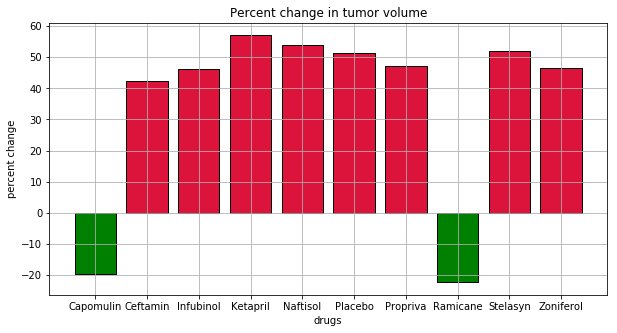

In [90]:
plt.figure(figsize=(10,5))
plt.bar(summary_x_axis,percent_change,align = 'center',color = colors, tick_label = drug_names,edgecolor = 'black')
plt.grid()
plt.xlabel('drugs')
plt.ylabel('percent change')
plt.title('Percent change in tumor volume')
plt.savefig('percent_change_tumor.png')
plt.show()

In [105]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()